In [1]:
import requests as rq
import time
import random
import lxml
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

/Users/boostigooff/.pyenv/versions/3.7.1/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.3) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
response = rq.get('http://www.livesinabox.com/friends/scripts.shtml')
doc = BeautifulSoup(response.text)

/Users/boostigooff/.pyenv/versions/3.7.1/lib/python3.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/boostigooff/.pyenv/versions/3.7.1/lib/python3.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [3]:
episodes = []
results = doc.find_all('li')
for result in results:
    episode = result.find('a').text.strip()
    episodes.append(episode)
episodes

['Episode 101: \n                                The Pilot-The Uncut Version',
 'Episode 102: \n                                The One With The Sonogram At the End',
 'Episode 103: \n                                The One With The Thumb',
 'Episode 104: \n                                The One With George Stephanopoulos',
 'Episode 105: The \n                                One With The East German Laundry Detergant',
 'Episode 106: The \n                                One With The Butt',
 'Episode 107: \n                                The One With The Blackout',
 'Episode 108: The \n                                One Where Nana Dies Twice',
 'Episode 109: The \n                                One Where Underdog Gets Away',
 'Episode 110: The \n                                One With The Monkey',
 'Episode 111: \n                                The One With Mrs. Bing',
 'Episode 112: \n                                The One With The Dozen Lasagnas',
 'Episode 113: The \n       

In [4]:
episodes = [episode.replace("Episode","") for episode in episodes]
episodes

[' 101: \n                                The Pilot-The Uncut Version',
 ' 102: \n                                The One With The Sonogram At the End',
 ' 103: \n                                The One With The Thumb',
 ' 104: \n                                The One With George Stephanopoulos',
 ' 105: The \n                                One With The East German Laundry Detergant',
 ' 106: The \n                                One With The Butt',
 ' 107: \n                                The One With The Blackout',
 ' 108: The \n                                One Where Nana Dies Twice',
 ' 109: The \n                                One Where Underdog Gets Away',
 ' 110: The \n                                One With The Monkey',
 ' 111: \n                                The One With Mrs. Bing',
 ' 112: \n                                The One With The Dozen Lasagnas',
 ' 113: The \n                                One With The Boobies',
 ' 114: \n                                T

In [5]:
episodes = [episode.replace(":\n","") for episode in episodes]
episodes

[' 101: \n                                The Pilot-The Uncut Version',
 ' 102: \n                                The One With The Sonogram At the End',
 ' 103: \n                                The One With The Thumb',
 ' 104: \n                                The One With George Stephanopoulos',
 ' 105: The \n                                One With The East German Laundry Detergant',
 ' 106: The \n                                One With The Butt',
 ' 107: \n                                The One With The Blackout',
 ' 108: The \n                                One Where Nana Dies Twice',
 ' 109: The \n                                One Where Underdog Gets Away',
 ' 110: The \n                                One With The Monkey',
 ' 111: \n                                The One With Mrs. Bing',
 ' 112: \n                                The One With The Dozen Lasagnas',
 ' 113: The \n                                One With The Boobies',
 ' 114: \n                                T

In [6]:
episodes = [episode.replace("\n","") for episode in episodes]
episodes

[' 101:                                 The Pilot-The Uncut Version',
 ' 102:                                 The One With The Sonogram At the End',
 ' 103:                                 The One With The Thumb',
 ' 104:                                 The One With George Stephanopoulos',
 ' 105: The                                 One With The East German Laundry Detergant',
 ' 106: The                                 One With The Butt',
 ' 107:                                 The One With The Blackout',
 ' 108: The                                 One Where Nana Dies Twice',
 ' 109: The                                 One Where Underdog Gets Away',
 ' 110: The                                 One With The Monkey',
 ' 111:                                 The One With Mrs. Bing',
 ' 112:                                 The One With The Dozen Lasagnas',
 ' 113: The                                 One With The Boobies',
 ' 114:                                 The One With The Candy Hearts

In [7]:
episodes = [episode.replace("Epsiode","") for episode in episodes]
episodes

[' 101:                                 The Pilot-The Uncut Version',
 ' 102:                                 The One With The Sonogram At the End',
 ' 103:                                 The One With The Thumb',
 ' 104:                                 The One With George Stephanopoulos',
 ' 105: The                                 One With The East German Laundry Detergant',
 ' 106: The                                 One With The Butt',
 ' 107:                                 The One With The Blackout',
 ' 108: The                                 One Where Nana Dies Twice',
 ' 109: The                                 One Where Underdog Gets Away',
 ' 110: The                                 One With The Monkey',
 ' 111:                                 The One With Mrs. Bing',
 ' 112:                                 The One With The Dozen Lasagnas',
 ' 113: The                                 One With The Boobies',
 ' 114:                                 The One With The Candy Hearts

In [8]:
episodes = [episode.replace("Episdoe","") for episode in episodes]
episodes


[' 101:                                 The Pilot-The Uncut Version',
 ' 102:                                 The One With The Sonogram At the End',
 ' 103:                                 The One With The Thumb',
 ' 104:                                 The One With George Stephanopoulos',
 ' 105: The                                 One With The East German Laundry Detergant',
 ' 106: The                                 One With The Butt',
 ' 107:                                 The One With The Blackout',
 ' 108: The                                 One Where Nana Dies Twice',
 ' 109: The                                 One Where Underdog Gets Away',
 ' 110: The                                 One With The Monkey',
 ' 111:                                 The One With Mrs. Bing',
 ' 112:                                 The One With The Dozen Lasagnas',
 ' 113: The                                 One With The Boobies',
 ' 114:                                 The One With The Candy Hearts

In [9]:
episodes = [episode.lstrip() for episode in episodes]
episodes = [episode.rstrip() for episode in episodes]
episodes = [re.sub('\s+', ' ', episode) for episode in episodes]
episodes


['101: The Pilot-The Uncut Version',
 '102: The One With The Sonogram At the End',
 '103: The One With The Thumb',
 '104: The One With George Stephanopoulos',
 '105: The One With The East German Laundry Detergant',
 '106: The One With The Butt',
 '107: The One With The Blackout',
 '108: The One Where Nana Dies Twice',
 '109: The One Where Underdog Gets Away',
 '110: The One With The Monkey',
 '111: The One With Mrs. Bing',
 '112: The One With The Dozen Lasagnas',
 '113: The One With The Boobies',
 '114: The One With The Candy Hearts',
 '115: The One With The Stoned Guy',
 '116: The One With Two Parts: Part One',
 '117: The One With Two Parts: Part Two',
 '118: The One With All The Poker',
 '119: The One Where The Monkey Gets Away',
 '120: The One With The Evil Orthodontist',
 '121: The One With The Fake Monica',
 '122: The One The Ick Factor',
 '123: The One With The Birth',
 '124: The One Where Rachel Finds Out',
 "201: The One With Ross's New Girlfriend",
 '202: The One With The Brea

In [10]:
titles = []
for episode in episodes:
    a= re.sub('\d+:', '', episode)
    b= a.lstrip()
    titles.append(b)

#titles = [re.sub('\d+:\s', '', episode) for episode in episodes]
titles

['The Pilot-The Uncut Version',
 'The One With The Sonogram At the End',
 'The One With The Thumb',
 'The One With George Stephanopoulos',
 'The One With The East German Laundry Detergant',
 'The One With The Butt',
 'The One With The Blackout',
 'The One Where Nana Dies Twice',
 'The One Where Underdog Gets Away',
 'The One With The Monkey',
 'The One With Mrs. Bing',
 'The One With The Dozen Lasagnas',
 'The One With The Boobies',
 'The One With The Candy Hearts',
 'The One With The Stoned Guy',
 'The One With Two Parts: Part One',
 'The One With Two Parts: Part Two',
 'The One With All The Poker',
 'The One Where The Monkey Gets Away',
 'The One With The Evil Orthodontist',
 'The One With The Fake Monica',
 'The One The Ick Factor',
 'The One With The Birth',
 'The One Where Rachel Finds Out',
 "The One With Ross's New Girlfriend",
 'The One With The Breast Milk',
 'The One Where Heckles Dies',
 "The One With Phoebe's Husband",
 'The One With Five Steaks and an Eggplant',
 'The One 

In [11]:
numbers = []

for episode in episodes:
    a = re.sub(':The..*', '', str(episode))
    b = re.sub(':\sThe..*', '', str(a))
    numbers.append(b)

#numbers = [episode.replace("\s","") for episode in episodes]
numbers


['101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '210',
 '211',
 '212',
 '214',
 '215',
 '216',
 '217',
 '218',
 '219',
 '220',
 '221',
 '222',
 '223',
 '224',
 '301',
 '302',
 '303',
 '304',
 '305',
 '306',
 '307',
 '308',
 '309',
 '310',
 '311',
 '312',
 '313',
 '314',
 '315',
 '316',
 '317',
 '318',
 '319',
 '320',
 '321',
 '322',
 '323',
 '324',
 '325',
 '401',
 '402',
 '403',
 '404',
 '405',
 '406',
 '407',
 '408',
 '409',
 '410',
 '411',
 '412',
 '413',
 '414',
 '415',
 '416',
 '417',
 '418',
 '419',
 '420',
 '421',
 '422',
 '423',
 '423',
 '501',
 '502',
 '503',
 '504',
 '505',
 '506',
 '507',
 '508',
 '509',
 '510',
 '511',
 '512',
 '513',
 '514',
 '515',
 '516',
 '517',
 '518',
 '519',
 '520',
 '521',
 '522',
 '523',
 '601',
 '602',
 '603',
 '604',
 '605',
 '606',


In [12]:
seasons = []
for number in numbers:
    season = re.sub('\d\d$', '', str(number))
    seasons.append(season)
seasons

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 'Friends'

In [13]:
urls = []
results = doc.find_all('li')
for result in results:
    url = result.find('a')['href']
    urls.append(url)
urls

['season1/101pilot.htm',
 'season1/102towsg.htm',
 'season1/103thumb.htm',
 'season1/104towgs.htm',
 'season1/105egld.htm',
 'season1/106butt.htm',
 'season1/107towbo.htm',
 'season1/108ndt.htm',
 'season1/109uga.htm',
 'season1/110monk.htm',
 'season1/111mbing.htm',
 'season1/112towdl.htm',
 'season1/113tits.htm',
 'season1/114towch.htm',
 'season1/115towsg.htm',
 'season1/116part1.htm',
 'season1/117part2.htm',
 'season1/118poke.htm',
 'season1/119mga.htm',
 'season1/120toweo.htm',
 'season1/121towfm.htm',
 'season1/122ick.htm',
 'season1/123birth.htm',
 'season1/124rafo.htm',
 'season2/201rng.htm',
 'season2/202brst.htm',
 'season2/203towhd.htm',
 'season2/204towph.htm',
 'season2/205fsae.htm',
 'season2/206baby.htm',
 'season2/207rofo.htm',
 'season2/208list.htm',
 'season2/209towpd.htm',
 'season2/210russ.htm',
 'season2/211towlw.htm',
 'season2/212toasb.htm',
 'season2/214towpv.htm',
 'season2/215rryk.htm',
 'season2/216jmo.htm',
 'season2/217emi.htm',
 'season2/218drd.htm',
 'se

In [14]:
full_urls = []
for url in urls:
    url = f"http://www.livesinabox.com/friends/{url}"
    full_urls.append(url)
full_urls[0]

'http://www.livesinabox.com/friends/season1/101pilot.htm'

In [15]:
len(full_urls)

231

In [16]:
df = pd.DataFrame(list(zip(seasons, numbers, titles, full_urls)), 
               columns =['Season', 'Episode', 'title', 'url']) 
df 

,Season,Episode,title,url
0,1,101,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...
1,1,102,The One With The Sonogram At the End,http://www.livesinabox.com/friends/season1/102...
2,1,103,The One With The Thumb,http://www.livesinabox.com/friends/season1/103...
3,1,104,The One With George Stephanopoulos,http://www.livesinabox.com/friends/season1/104...
4,1,105,The One With The East German Laundry Detergant,http://www.livesinabox.com/friends/season1/105...
5,1,106,The One With The Butt,http://www.livesinabox.com/friends/season1/106...
6,1,107,The One With The Blackout,http://www.livesinabox.com/friends/season1/107...
7,1,108,The One Where Nana Dies Twice,http://www.livesinabox.com/friends/season1/108...
8,1,109,The One Where Underdog Gets Away,http://www.livesinabox.com/friends/season1/109...
9,1,110,The One With The Monkey,http://www.livesinabox.com/friends/season1/110...


In [17]:
urltest = "http://www.livesinabox.com/friends/season9/919dream.htm"
response = rq.get(urltest)
doc = BeautifulSoup(response.content)
line_text = []
scripts = doc.find_all('p')
for script in scripts:
    line_text.append(script.text.strip())
line_text

['Teleplay: Mark Kunerth\n  Story: Dana Klein\n  Directed by: Terry Hughes\n  Transcribed by: Eleonora, Pheeboh, Sebastiano & Vanessa',
 "[Scene: Rachel and Joey's apartment]",
 "Joey: (talking to a pineapple in his hand) God, you're beautiful...why \n  are we fighting this?You know you want it to happen as much as I do.",
 '(Rachel comes out of her room and starts staring at him unseen)',
 'Joey: I want you.I need you.Let me make love to you.',
 "Rachel: I don't wanna stand in the way of true love or anything, but \n  I think a canelope might hurt less.",
 "Joey: Oh, ehm...I'm...I'm rehearsing my lines.They gave me a big romantic \n  story on Days Of Our Lives. It's the first time my character's got one. I'm \n  so nervous, you know, I really want it to be good!",
 "Rachel: Woow!I haven't seen you this worked up since you did that dog \n  food commercial and you thought you were gonna be with a real talking dog!",
 "Joey: Yeah, that was a disappointment...(pause) Oh, hey!D'you want to

In [18]:
clean_lines = []
for line in line_text:
    a = re.sub('(\n)', ' ', str(line))
    b = re.sub('\xa0', '', a)
    c = re.sub('(Written by:\s\w.*)', '', b, )
    d = re.sub('(\[\w.*\])', '', c)
    e = re.sub('(-\s\(\s\w.*\s\)\s-)', '', d)
    f = re.sub('-', '', e)
    g = re.sub('(\(.*\))', '', f)
    h = re.sub('(Commercial Break)', '', g)
    i = re.sub('(Closing Credits)', '', h)
    j = re.sub('(End)', '', i)
    clean_lines.append(j)

print (clean_lines)

['Teleplay: Mark Kunerth   Story: Dana Klein   Directed by: Terry Hughes   Transcribed by: Eleonora, Pheeboh, Sebastiano & Vanessa', '', "Joey:  God, you're beautiful...why    are we fighting this?You know you want it to happen as much as I do.", '', 'Joey: I want you.I need you.Let me make love to you.', "Rachel: I don't wanna stand in the way of true love or anything, but    I think a canelope might hurt less.", "Joey: Oh, ehm...I'm...I'm rehearsing my lines.They gave me a big romantic    story on Days Of Our Lives. It's the first time my character's got one. I'm    so nervous, you know, I really want it to be good!", "Rachel: Woow!I haven't seen you this worked up since you did that dog    food commercial and you thought you were gonna be with a real talking dog!", "Joey: Yeah, that was a disappointment... Oh, hey!D'you want to    come down to the set and tell me if I'm doing ok?", 'Rachel:  Are you serious?', 'Joey: Yeah!Hey, you just have to promise not to get yourself thrown    o

In [19]:
clean_lines = [clean for clean in clean_lines if str(clean) != '']

clean_lines

['Teleplay: Mark Kunerth   Story: Dana Klein   Directed by: Terry Hughes   Transcribed by: Eleonora, Pheeboh, Sebastiano & Vanessa',
 "Joey:  God, you're beautiful...why    are we fighting this?You know you want it to happen as much as I do.",
 'Joey: I want you.I need you.Let me make love to you.',
 "Rachel: I don't wanna stand in the way of true love or anything, but    I think a canelope might hurt less.",
 "Joey: Oh, ehm...I'm...I'm rehearsing my lines.They gave me a big romantic    story on Days Of Our Lives. It's the first time my character's got one. I'm    so nervous, you know, I really want it to be good!",
 "Rachel: Woow!I haven't seen you this worked up since you did that dog    food commercial and you thought you were gonna be with a real talking dog!",
 "Joey: Yeah, that was a disappointment... Oh, hey!D'you want to    come down to the set and tell me if I'm doing ok?",
 'Rachel:  Are you serious?',
 'Joey: Yeah!Hey, you just have to promise not to get yourself thrown    o

In [20]:
speakers = []
for line in clean_lines:
    speaker = re.sub('(:.*)', '', str(line))
    speakers.append(speaker)
speakers

['Teleplay',
 'Joey',
 'Joey',
 'Rachel',
 'Joey',
 'Rachel',
 'Joey',
 'Rachel',
 'Joey',
 'Rachel',
 'Joey',
 'Rachel',
 'Opening credits',
 'Monica',
 'Phoebe',
 'Ross',
 'Monica',
 'Phoebe',
 'Ross',
 'Monica',
 'Phoebe',
 'Ross',
 'Phoebe',
 'Chandler',
 'Phoebe',
 'Chandler',
 'Phoebe',
 'Chandler',
 'Monica',
 'Chandler',
 'Monica',
 'Chandler',
 'Monica',
 'Phoebe',
 'Chandler',
 'Ross',
 'Chandler',
 'Ross',
 'Monica',
 'Ross',
 'Monica',
 'Ross',
 'Rachel',
 'Joey',
 'Rachel',
 'Joey',
 'Rachel',
 'Joey',
 'Director',
 'Joey',
 'Rachel',
 'Joey',
 'Rachel',
 'Director',
 'Actress/Olivia',
 'Joey/Drake',
 'Actress/Olivia',
 'Joey/Drake',
 'Actress/Olivia',
 'Joey/Drake',
 'Actress/Olivia',
 'Joey/Drake',
 'Rachel',
 'Actress/Olivia',
 'Joey/Drake',
 'Chase Lassiter',
 'Rachel',
 'Joey/Drake',
 'Actress/Olivia',
 'Joey/Drake',
 'Actress/Olivia',
 'Joey/Drake',
 'Director',
 'Rachel',
 '1st Customer',
 'Monica',
 '2nd Customer',
 'Monica',
 '3rd Customer',
 'Monica',
 '3rd Custo

In [21]:
line_text = []
for line in clean_lines:
    text = re.sub('\w.*:', '', str(line))
    line_text.append(text)
line_text

[' Eleonora, Pheeboh, Sebastiano & Vanessa',
 "  God, you're beautiful...why    are we fighting this?You know you want it to happen as much as I do.",
 ' I want you.I need you.Let me make love to you.',
 " I don't wanna stand in the way of true love or anything, but    I think a canelope might hurt less.",
 " Oh, ehm...I'm...I'm rehearsing my lines.They gave me a big romantic    story on Days Of Our Lives. It's the first time my character's got one. I'm    so nervous, you know, I really want it to be good!",
 " Woow!I haven't seen you this worked up since you did that dog    food commercial and you thought you were gonna be with a real talking dog!",
 " Yeah, that was a disappointment... Oh, hey!D'you want to    come down to the set and tell me if I'm doing ok?",
 '  Are you serious?',
 ' Yeah!Hey, you just have to promise not to get yourself thrown    out again.',
 ' Hey, that was an honest mistake!',
 ' Right!',
 ' Yeah, that was an awesome day!',
 'Opening credits',
 ' Hey!',
 ' Hey

In [22]:
texts = []
for url in df['url']:
    response = rq.get(url)
    doc = BeautifulSoup(response.text)
    try:
        scripts = doc.find_all('p')
        texts.append(scripts)
    except:
        pass

        

In [23]:
len(texts)

231

In [24]:
df['text'] = texts

In [25]:
clean_lines = []
for lines in df['text']:
    scripts = []
    for line in lines:
        a = re.sub('(\n)', ' ', str(line))
        b = re.sub('\xa0', '', a)
        c = re.sub('(Written by:\s\w.*)', '', b, )
        d = re.sub('\s(\(\w.*?\))', '', c)
        e = re.sub('(\s\(\s\w.*\s?\)\s)', '', d)
        f = re.sub('-', '', e)
        g = re.sub('(\(.*?\))', '', f)
        h = re.sub('(Commercial Break)', '', g)
        i = re.sub('(Closing Credits)', '', h)
        j = re.sub('(End)', '', i)
        k = re.sub('(\x92)', "'", j)
        l = re.sub('(Opening Credits)', '', k)
        m = re.sub('(</p>)', '', l)
        n = re.sub('(<p>)', '', m)
        o = re.sub('(<b>)', '', n)
        p = re.sub('(</b>)', '', o)
        q = re.sub('(<em>)', '', p)
        r = re.sub('(</em>)', '', q)
        s = re.sub('(<p align="center">)', '', r)
        t = re.sub('(<strong>)', '', s)
        u = re.sub('(</strong>)', '', t)
        v = re.sub('(\x97)', ' ', u)
        w = re.sub('(\x85)', ' ', v)
        x = re.sub('(<!webbot bot="ImageMap" startspan rectangle=" " border="0" height="60" src="contrl08.gif" usemap="#FrontPageMap0" width="194"/><!webbot bot="ImageMap" ichecksum="8835" endspan >)', '', w)
        y = re.sub('(<i>)', '', x)
        z = re.sub('(</i>)', '', y)
        aa = re.sub('(ENDING CREDITS)', '', z)
        bb = re.sub('(<font size="4">END</font>)', '', aa)
        cc = re.sub('(ing Credits)', '', bb)
        dd = re.sub('(\s\s+)', ' ', cc)
        ee = re.sub('(we re)', "we're ", dd)
        ff = re.sub('(<p class="scene">)', '', ee)
        gg = re.sub('(<p class="center">Closing credits)', '', ff)
        hh = re.sub('(Teleplay:).*', '', gg)
        ii = re.sub('(<p class="center">Opening credits)', '', hh)
        jj = re.sub('(\[Scene:.*?\])', '', ii)
        kk = re.sub('(<font size="3"></font>)', '', jj)
        ll = re.sub('(<p align="left">)', '', kk)
        mm = re.sub('(\[.*?\])', '', ll)
        nn = re.sub('(<font size="3"></font>)', '', mm)
        oo = re.sub('(</font>)', '', nn)
        pp = re.sub('(<font size="3">)', '', oo)
        qq = re.sub('(<font color="#0000FF" size="3">)', '', pp)
        rr = re.sub('(<font color="#0000FF">)', '', qq)
        ss = re.sub('(<font color="#000000">)', '', rr)
        tt = re.sub('(<a href="http)', '', ss)
        uu = re.sub('(&amp)', '', tt)
        vv = re.sub('(<p class="MsoNormal" style="margintop)', '', uu)
        ww = re.sub('(©2002 by r3v3LaT1oN a.k.a UnTaMeD_hAvOc)', '', vv)
        xx = re.sub('(<font face="Tahoma" size="2">)', '', ww)
        yy = re.sub('(Story by Mark J. Kunerth <br/> Teleplay by Richard Goodman <br/> Transcribed by)', '', xx)
        zz = re.sub('(<br/> <br/>)', '', yy)
        aaa = re.sub('(TIME LAPSE<br/> )', '', zz)
        bbb = re.sub('(COMMERCIAL BREAK )', '', aaa)
        ccc = re.sub('(<a name="line23"></a>)', '', bbb)
        ddd = re.sub('(<font size="2">)', '', ccc)
        eee = re.sub('(<br/> CUT TO)', '', ddd)
        fff = re.sub('\(.*?\.', '', eee)
        ggg = re.sub('<p class="style1">OPENING SEQUENCE', '', fff)
        hhh = re.sub(' RACHEL', 'Rachel', ggg)
        iii = re.sub(' MONICA', 'Monica', hhh)
        jjj = re.sub('ROSS', 'Ross', iii)
        kkk = re.sub('OPENING CREDITS', '', jjj)
        lll = re.sub('(<a.*?</a>)', '', kkk)
        mmm = re.sub('(<.*?>)', '', lll)
        scripts.append(mmm)
    clean_lines.append(scripts)


In [26]:
clean_lines[40]

['Written by:',
 " AMBER: Oh Drake. DR. REMORE: I'm sorry Amber. It's just like Brad to have to have the last word.  Ross: I'm sorry I'm late, what happened?Monica: We, we just wanna see the end. AMBER: I want you Drake. DR. REMORE: I know you do but you and I can never be together that way. AMBER: What? DR. REMORE: There's something I never told you Amber. I'm actually your half brother. Rachel: So what happens next?  JOEY: Well, I get the medical award for separating the siamese twins. Then Amber and I go to Venezuela to meet our other halfbrother, Ramone. And that's where I find the world's biggest emerald. It's really big but it's cursed. CHANDLER: God that is good TV. OPENING TITLES   CHANDLER: Phoebs, play with meeee. PHOEBE: No. This game is grotesque. Twenty armless guys joined at the waist by a steel bar, forced to play soccer forever. Ahh, hello, humanrights violation.  CHANDLER: Ya know Phoebs, don't feel so bad for 'em. After they're done playing, I break out the little pla

In [27]:
df['text'] = clean_lines

In [28]:
len(df['text'])

231

In [29]:
clean_lines_ok = []
for clean in clean_lines:
    scripts = []
    for line in clean:
        if str(line) != '':
            if str(line) != ' ':
                scripts.append(line)
    clean_lines_ok.append(scripts)
clean_lines_ok[8]

["Rachel: Terry, I, I, I know that I haven't worked here very long, but I was wondering, do you think it would be possible if I got a $100 advance in my salary?",
 'Terry: An advance?',
 "Rachel: It's so that I can spend Thanksgiving with my family. See, every year we go skiing in Vail, and normally my father pays for my ticket, but I sort of started the whole independence thing, you know, which is actually why I took this job.",
 "Terry: Rachel, Rachel, sweetheart. You're a terrible, terrible waitress. Really, really awful.",
 "Rachel: Ok, I, I hear what you're sayin'. I'm with you. Um, but I, but I'm trying really hard. And I think I'm doing better. I really do. Does anybody need coffee? Oh, look at that.",
 "Rachel: Excuse me, sir. Hi, you come in here all time. I was just wondering, do you think there's a possibility that you could give me an advance on my tips?",
 'Guy: Huh?',
 "Rachel: Ok, ok, that's fine. Fine. Hey, I'm sorry about that spill before. Only $98.50 to go. ",
 'Moni

In [30]:
df['text'] = clean_lines_ok

In [31]:
len(clean_lines_ok[0])

300

In [32]:
df.head()

,Season,Episode,title,url,text
0,1,101,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,[Monica: There's nothing to tell! He's just so...
1,1,102,The One With The Sonogram At the End,http://www.livesinabox.com/friends/season1/102...,"[Monica: What you guys don't understand is, fo..."
2,1,103,The One With The Thumb,http://www.livesinabox.com/friends/season1/103...,"[Phoebe: Hi guys! , All: Hey, Pheebs! Hi! , Ro..."
3,1,104,The One With George Stephanopoulos,http://www.livesinabox.com/friends/season1/104...,"[Monica: Alright. Phoebe? , Phoebe: Okay, okay..."
4,1,105,The One With The East German Laundry Detergant,http://www.livesinabox.com/friends/season1/105...,[Monica: Would you let it go? It's not that bi...


In [33]:
lines_list = []

for x in range (0, 231):
    for t in df.iloc[x]['text']:
        lines ={}
        lines['episode'] = df.iloc[x]['Episode']
        lines['season'] = df.iloc[x]['Season']
        lines['title'] = df.iloc[x]['title']
        lines['url'] = df.iloc[x]['url']
        lines['text'] = t
        lines_list.append(lines)

lines_list[0]

{'episode': '101',
 'season': '1',
 'title': 'The Pilot-The Uncut Version',
 'url': 'http://www.livesinabox.com/friends/season1/101pilot.htm',
 'text': "Monica: There's nothing to tell! He's just some guy I work with!"}

In [34]:
df_friends = pd.DataFrame(lines_list)

In [35]:
df_friends.head()

,episode,season,text,title,url
0,101,1,Monica: There's nothing to tell! He's just som...,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...
1,101,1,"Joey: C'mon, you're going out with the guy! Th...",The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...
2,101,1,"Chandler: All right Joey, be nice. So does he ...",The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...
3,101,1,"Phoebe: Wait, does he eat chalk?",The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...
4,101,1,"Phoebe: Just, 'cause, I don't want her to go t...",The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...


In [36]:
speakers = []
for line in df_friends['text']:
    speaker = re.sub('(:.*)', '', str(line))
    speakers.append(speaker)
speakers[56]


'Phoebe'

In [37]:
for speaker in speakers:
    if speaker == 'Rach':
        speaker.replace("Rach","Rachel")
    elif speaker == 'Mon':
        speaker.replace('Mon', 'Monica')
    elif speaker == 'Phoe':
        speaker.replace('Phoe', 'Phoebe')
    elif speaker == 'Chan':
        speaker.replace('Chan', 'Chandler')
    elif speaker == 'ROSS':
        speaker.replace('ROSS', 'Ross')
    elif speaker == ' ROSS':
        speaker.replace(' ROSS', 'Ross')
    elif speaker == 'RACHEL':
        speaker.replace('RACHEL', 'Rachel')
    elif speaker == ' RACHEL':
        speaker.replace(' RACHEL', 'Rachel')
    elif speaker == 'MONICA':
        speaker.replace('MONICA', 'Monica')
    elif speaker == ' MONICA':
        speaker.replace(' MONICA', 'Monica')
    elif speaker == ' JOEY':
        speaker.replace(' JOEY', 'Joey')
    elif speaker == 'JOEY':
        speaker.replace('JOEY', 'Joey')
    elif speaker == ' CHANDLER':
        speaker.replace(' CHANDLER', 'Chandler')
    elif speaker == 'CHANDLER':
        speaker.replace('CHANDLER', 'Chandler')
    elif speaker == ' PHOEBE':
        speaker.replace(' PHOEBE', 'Phoebe')
    elif speaker == 'PHOEBE':
        speaker.replace('PHOEBE', 'Phoebe')
    elif speaker == 'MNCA':
        speaker.replace('MNCA', 'Monica')
    elif speaker == 'PHOE':
        speaker.replace('PHOE', 'Phoebe')
    elif speaker == 'CHAN':
        speaker.replace('CHAN', 'Chandler')
    elif speaker == 'FBOB':
        speaker.replace('FBOB', 'FunBob')
    
speakers    


['Monica',
 'Joey',
 'Chandler',
 'Phoebe',
 'Phoebe',
 'Monica',
 'Chandler',
 'Chandler',
 'All',
 'Chandler',
 'Joey',
 'Chandler',
 'Joey',
 'Phoebe',
 'Chandler',
 'Monica',
 'Chandler',
 'Ross',
 'Joey',
 'Monica',
 'Ross',
 'Chandler',
 'Monica',
 'Joey',
 'Monica',
 'Ross',
 'Phoebe',
 'Ross',
 'Phoebe',
 'Ross',
 'Monica',
 'Ross',
 'Joey',
 'Ross',
 'Chandler',
 'Ross',
 'Monica',
 'Ross',
 'Joey',
 'Joey',
 'Ross',
 'Chandler',
 'Monica',
 'Rachel',
 'Waitress',
 'Monica',
 'Rachel',
 'Ross',
 'Monica',
 'Rachel',
 'Monica',
 'Rachel',
 'Monica',
 'Chandler',
 'Ross',
 'Rachel',
 'Phoebe',
 'Chandler',
 'Joey',
 'Phoebe, Ross, Chandler, and Joey',
 'Rachel',
 'Ross',
 'Rachel',
 'Monica',
 'Rachel',
 'Monica',
 'Phoebe',
 'Rachel',
 'Phoebe',
 'Monica',
 'Joey',
 'Monica',
 'Joey',
 'Chandler',
 'Paul',
 'Monica',
 'Joey',
 'Ross',
 'Monica',
 'Ross',
 'Monica',
 'Chandler',
 'Monica',
 'Rachel',
 'Monica',
 'Ross',
 'Monica',
 'Ross',
 'Phoebe',
 'Monica',
 'All',
 'Chandle

In [38]:
df_friends['speaker'] = speakers

In [39]:
df_friends['speaker'].value_counts()

Rachel                                                                                                                                                                                                                                                                                                                                                                                                                                                                 8849
Ross                                                                                                                                                                                                                                                                                                                                                                                                                                                                   8804
Chandler                                                                        

In [40]:
len(clean_lines_ok)

231

In [41]:
line_text = []
for line in df_friends['text']:
    text = re.sub('\w.*:', '', str(line))
    line_text.append(text)
line_text


[" There's nothing to tell! He's just some guy I work with!",
 " C'mon, you're going out with the guy! There's gotta be something wrong with him!",
 ' All right Joey, be nice. So does he have a hump? A hump and a hairpiece?',
 ' Wait, does he eat chalk?',
 " Just, 'cause, I don't want her to go through what I went through with Carl oh!",
 " Okay, everybody relax. This is not even a date. It's just two people going out to dinner and not having sex.",
 ' Sounds like a date to me.',
 " Alright, so I'm back in high school, I'm standing in the middle of the cafeteria, and I realize I am totally naked.",
 ' Oh, yeah. Had that dream.',
 " Then I look down, and I realize there's a phone... there.",
 ' Instead of...?',
 " That's right.",
 ' Never had that dream.',
 ' No.',
 " All of a sudden, the phone starts to ring. Now I don't know what to do, everybody starts looking at me. ",
 " And they weren't looking at you before?!",
 " Finally, I figure I'd better answer it, and it turns out it's my m

In [42]:
df_friends['line_text'] = line_text

In [43]:
df_friends.head()

,episode,season,text,title,url,speaker,line_text
0,101,1,Monica: There's nothing to tell! He's just som...,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Monica,There's nothing to tell! He's just some guy I...
1,101,1,"Joey: C'mon, you're going out with the guy! Th...",The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Joey,"C'mon, you're going out with the guy! There's..."
2,101,1,"Chandler: All right Joey, be nice. So does he ...",The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Chandler,"All right Joey, be nice. So does he have a hu..."
3,101,1,"Phoebe: Wait, does he eat chalk?",The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Phoebe,"Wait, does he eat chalk?"
4,101,1,"Phoebe: Just, 'cause, I don't want her to go t...",The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Phoebe,"Just, 'cause, I don't want her to go through ..."


In [44]:
df_friends['season'].value_counts()

4          6830
9          6801
3          6505
6          6480
7          6337
5          6250
8          6235
1          5993
10         5984
2          2358
Friends     188
Name: season, dtype: int64

In [45]:
df_friends.drop('text', axis=1)

,episode,season,title,url,speaker,line_text
0,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Monica,There's nothing to tell! He's just some guy I...
1,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Joey,"C'mon, you're going out with the guy! There's..."
2,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Chandler,"All right Joey, be nice. So does he have a hu..."
3,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Phoebe,"Wait, does he eat chalk?"
4,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Phoebe,"Just, 'cause, I don't want her to go through ..."
5,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Monica,"Okay, everybody relax. This is not even a dat..."
6,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Chandler,Sounds like a date to me.
7,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Chandler,"Alright, so I'm back in high school, I'm stan..."
8,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,All,"Oh, yeah. Had that dream."
9,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Chandler,"Then I look down, and I realize there's a pho..."


In [46]:
df_friends.drop('text', axis=1).to_csv("friends.csv", index= False)
df = pd.read_csv("friends.csv")
df.head()

,episode,season,title,url,speaker,line_text
0,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Monica,There's nothing to tell! He's just some guy I...
1,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Joey,"C'mon, you're going out with the guy! There's..."
2,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Chandler,"All right Joey, be nice. So does he have a hu..."
3,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Phoebe,"Wait, does he eat chalk?"
4,101,1,The Pilot-The Uncut Version,http://www.livesinabox.com/friends/season1/101...,Phoebe,"Just, 'cause, I don't want her to go through ..."


In [47]:
characters = df['speaker'].value_counts().head(6)
characters

Rachel      8849
Ross        8804
Chandler    8034
Monica      7929
Joey        7817
Phoebe      7081
Name: speaker, dtype: int64

In [48]:
seasons = df['season'].unique()
seasons

array(['1', '2', '3', '4', '5', '6', '7', 'Friends', '8', '9', '10'],
      dtype=object)

In [49]:
characters.sort_values()

Phoebe      7081
Joey        7817
Monica      7929
Chandler    8034
Ross        8804
Rachel      8849
Name: speaker, dtype: int64

In [50]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/Library/Fonts/BigCaslon.ttf',
 '/System/Library/Fonts/PingFang.ttc',
 '/System/Library/Fonts/SFNSSymbols-Ultralight.otf',
 '/Library/Fonts/Shree714.ttc',
 '/Library/Fonts/Comic Sans MS Bold.ttf',
 '/System/Library/Fonts/MarkerFelt.ttc',
 '/System/Library/Fonts/SFNSDisplay-SemiboldItalic.otf',
 '/Library/Fonts/STIXNonUniBol.otf',
 '/Library/Fonts/KufiStandardGK.ttc',
 '/Library/Fonts/Wingdings 2.ttf',
 '/System/Library/Fonts/STHeiti Light.ttc',
 '/Library/Fonts/Nadeem.ttc',
 '/Library/Fonts/Sana.ttc',
 '/System/Library/Fonts/SFNSTextCondensed-Light.otf',
 '/System/Library/Fonts/Apple Symbols.ttf',
 '/System/Library/Fonts/ヒラギノ角ゴシック W8.ttc',
 '/Library/Fonts/Arial Rounded Bold.ttf',
 '/Library/Fonts/Corsiva.ttc',
 '/Library/Fonts/Arial Black.ttf',
 '/Library/Fonts/Kailasa.ttc',
 '/Library/Fonts/Arial Narrow Bold Italic.ttf',
 '/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf',
 '/Library/Fonts/Seravek.ttc',
 '/System/Library/Fonts/Avenir Next.ttc',
 '/System/Library/Fonts/Lucida

In [51]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/boostigooff/.pyenv/versions/3.7.1/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

/Users/boostigooff/Library/Fonts/GABRWFFR.TTF

/Users/boostigooff/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
findfont: Font family ["Gabriel Weiss' Friends"] not found. Falling back to DejaVu Sans.
findfont: Font family ["Gabriel Weiss' Friends"] not found. Falling back to DejaVu Sans.


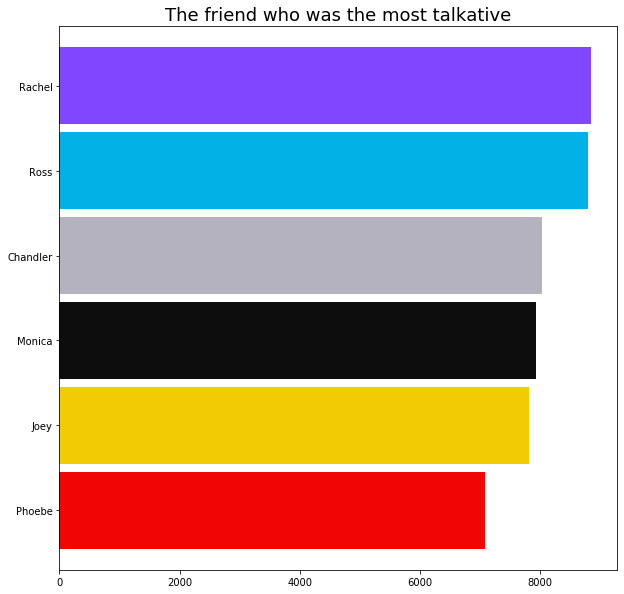

In [52]:
import os
from matplotlib import font_manager as fm, rcParams
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt


colors = ['#F20505', '#F2CB05', '#0D0D0D', '#B5B2BF', '#02B2E7', '#7F47FF']

ax = characters.sort_values().plot(kind='barh', width = 0.9, figsize = (10, 10), colors = colors)
for tick in ax.get_xticklabels():
    tick.set_fontname("Gabriel Weiss' Friends")
for tick in ax.get_yticklabels():
    tick.set_fontname("Gabriel Weiss' Friends")
ax.set_title("The friend who was the most talkative", fontname="Gabriel Weiss' Friends", fontsize=18)
plt.savefig("interventions.pdf")


In [53]:
ohmygod = []
df['line_text'] = df['line_text'].astype('str') 
for line in df['line_text']:
    ohmygod_count = line.count("Oh my God!")
    ohmygod.append(ohmygod_count)
sum(ohmygod)

476

In [54]:
howyoudoin = []
df['line_text'] = df['line_text'].astype('str') 
for line in df['line_text']:
    howyoudoin_count = line.count('How you doin')
    howyoudoin.append(howyoudoin_count)
sum(howyoudoin)

28

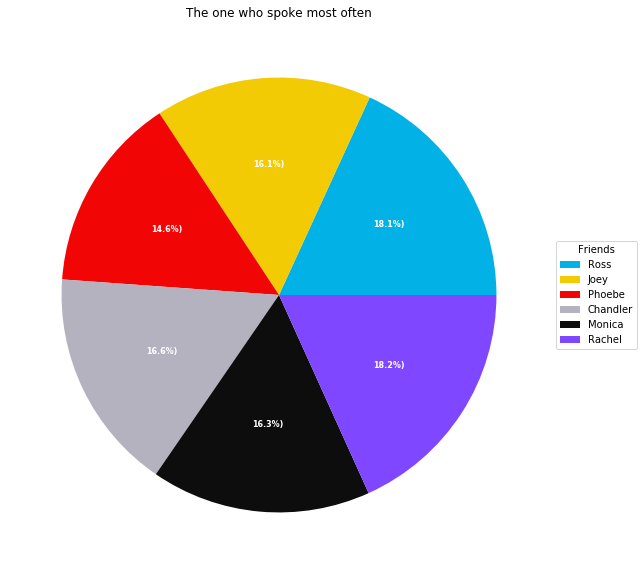

<Figure size 432x288 with 0 Axes>

In [55]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

friends = ["8803 Ross",
          "7816 Joey",
          "7079 Phoebe",
          "8032 Chandler",
          "7927 Monica",
          "8846 Rachel"]


data = [float(x.split()[0]) for x in friends]
ingredients = [x.split()[-1] for x in friends]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%)".format(pct, absolute)

colors = ['#02B2E7','#F2CB05','#F20505','#B5B2BF','#0D0D0D', '#7F47FF']
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), colors = colors)

ax.legend(wedges, ingredients,
          title="Friends",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("The one who spoke most often")

plt.show()
plt.savefig("pie1.pdf")

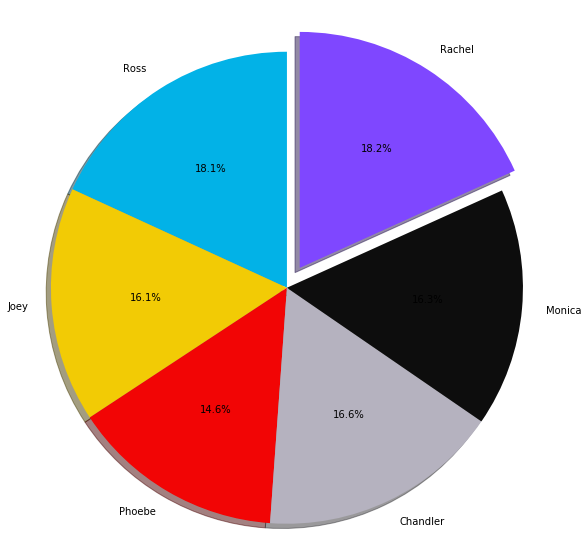

In [56]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

friends = 'Ross', 'Joey', 'Phoebe', 'Chandler', 'Monica', 'Rachel'

interventions = [8803, 7816, 7079, 8032, 7927, 8846]
explode = (0, 0, 0, 0, 0, 0.1)  # only "explode" the 6th slice (i.e. 'Hogs')
colors = ['#02B2E7','#F2CB05','#F20505','#B5B2BF','#0D0D0D', '#7F47FF']

fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(interventions, explode=explode, labels=friends, autopct='%1.1f%%', colors = colors, 
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("ipie2.pdf")

plt.show()

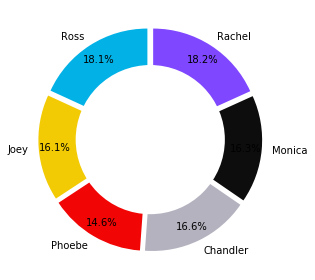

In [84]:
import matplotlib.pyplot as plt
#plot([1,2,3,4,5],[5,4,3,2,1],"bx")
#show()

# Pie chart
labels = 'Ross', 'Joey', 'Phoebe', 'Chandler', 'Monica', 'Rachel'
sizes = [8803, 7816, 7079, 8032, 7927, 8846]
#colors
colors = ['#02B2E7','#F2CB05','#F20505','#B5B2BF','#0D0D0D','#7F47FF']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

plt.savefig("pie_donut.pdf")
plt.show()

In [58]:
import itertools
season_chars=list(itertools.product(list(df['season'].unique()), list(df['speaker'].value_counts().head(6).index)))
del season_chars[42:48]
season_chars


[('1', 'Rachel'),
 ('1', 'Ross'),
 ('1', 'Chandler'),
 ('1', 'Monica'),
 ('1', 'Joey'),
 ('1', 'Phoebe'),
 ('2', 'Rachel'),
 ('2', 'Ross'),
 ('2', 'Chandler'),
 ('2', 'Monica'),
 ('2', 'Joey'),
 ('2', 'Phoebe'),
 ('3', 'Rachel'),
 ('3', 'Ross'),
 ('3', 'Chandler'),
 ('3', 'Monica'),
 ('3', 'Joey'),
 ('3', 'Phoebe'),
 ('4', 'Rachel'),
 ('4', 'Ross'),
 ('4', 'Chandler'),
 ('4', 'Monica'),
 ('4', 'Joey'),
 ('4', 'Phoebe'),
 ('5', 'Rachel'),
 ('5', 'Ross'),
 ('5', 'Chandler'),
 ('5', 'Monica'),
 ('5', 'Joey'),
 ('5', 'Phoebe'),
 ('6', 'Rachel'),
 ('6', 'Ross'),
 ('6', 'Chandler'),
 ('6', 'Monica'),
 ('6', 'Joey'),
 ('6', 'Phoebe'),
 ('7', 'Rachel'),
 ('7', 'Ross'),
 ('7', 'Chandler'),
 ('7', 'Monica'),
 ('7', 'Joey'),
 ('7', 'Phoebe'),
 ('8', 'Rachel'),
 ('8', 'Ross'),
 ('8', 'Chandler'),
 ('8', 'Monica'),
 ('8', 'Joey'),
 ('8', 'Phoebe'),
 ('9', 'Rachel'),
 ('9', 'Ross'),
 ('9', 'Chandler'),
 ('9', 'Monica'),
 ('9', 'Joey'),
 ('9', 'Phoebe'),
 ('10', 'Rachel'),
 ('10', 'Ross'),
 ('10', 'C

In [59]:
sea_char_result={}
for season_char in season_chars:
    lines = df[(df['speaker'] == season_char[1])& (df['season'] == season_char[0])]  
    speeches_lenght = []
    for index, line in lines.iterrows():
        lenght = len(line['line_text'])
        speeches_lenght.append(lenght)
    sea_char_result[season_char]=sum(speeches_lenght)

In [60]:
sea_char_result

{('1', 'Rachel'): 45185,
 ('1', 'Ross'): 53282,
 ('1', 'Chandler'): 46295,
 ('1', 'Monica'): 41258,
 ('1', 'Joey'): 32536,
 ('1', 'Phoebe'): 32950,
 ('2', 'Rachel'): 16045,
 ('2', 'Ross'): 20395,
 ('2', 'Chandler'): 13385,
 ('2', 'Monica'): 10394,
 ('2', 'Joey'): 9027,
 ('2', 'Phoebe'): 13579,
 ('3', 'Rachel'): 44743,
 ('3', 'Ross'): 54850,
 ('3', 'Chandler'): 45982,
 ('3', 'Monica'): 42259,
 ('3', 'Joey'): 43490,
 ('3', 'Phoebe'): 47198,
 ('4', 'Rachel'): 53828,
 ('4', 'Ross'): 50554,
 ('4', 'Chandler'): 52361,
 ('4', 'Monica'): 42574,
 ('4', 'Joey'): 47550,
 ('4', 'Phoebe'): 48802,
 ('5', 'Rachel'): 51907,
 ('5', 'Ross'): 46832,
 ('5', 'Chandler'): 44134,
 ('5', 'Monica'): 43637,
 ('5', 'Joey'): 49666,
 ('5', 'Phoebe'): 44469,
 ('6', 'Rachel'): 56047,
 ('6', 'Ross'): 52223,
 ('6', 'Chandler'): 53458,
 ('6', 'Monica'): 45249,
 ('6', 'Joey'): 54868,
 ('6', 'Phoebe'): 42742,
 ('7', 'Rachel'): 59480,
 ('7', 'Ross'): 45903,
 ('7', 'Chandler'): 44214,
 ('7', 'Monica'): 48257,
 ('7', 'Joey'

In [61]:
df1 = pd.DataFrame.from_dict(sea_char_result, orient='index', columns=["count"])

df1.head()

,count
"(1, Rachel)",45185
"(1, Ross)",53282
"(1, Chandler)",46295
"(1, Monica)",41258
"(1, Joey)",32536


In [62]:
df1["season_char"] =df1.index
df1=df1.reset_index(drop=True)
df1["season"]=df1["season_char"].apply(lambda x: x[0])
df1["char"]=df1["season_char"].apply(lambda x: x[1])
df1=df1.drop(columns=["season_char"])
df1.head()

,count,season,char
0,45185,1,Rachel
1,53282,1,Ross
2,46295,1,Chandler
3,41258,1,Monica
4,32536,1,Joey


In [63]:
df1['count'].unique()

array([45185, 53282, 46295, 41258, 32536, 32950, 16045, 20395, 13385,
       10394,  9027, 13579, 44743, 54850, 45982, 42259, 43490, 47198,
       53828, 50554, 52361, 42574, 47550, 48802, 51907, 46832, 44134,
       43637, 49666, 44469, 56047, 52223, 53458, 45249, 54868, 42742,
       59480, 45903, 44214, 48257, 49008, 40247, 58363, 52102, 31823,
       44443, 54062, 39125, 44842, 53348, 52194, 44391, 42766, 40487,
       43829, 45654, 37538, 38537, 40138, 41578])

In [64]:
df1.groupby(['char', 'count', 'season']).size()

char      count  season
Chandler  13385  2         1
          31823  8         1
          37538  10        1
          44134  5         1
          44214  7         1
          45982  3         1
          46295  1         1
          52194  9         1
          52361  4         1
          53458  6         1
Joey      9027   2         1
          32536  1         1
          40138  10        1
          42766  9         1
          43490  3         1
          47550  4         1
          49008  7         1
          49666  5         1
          54062  8         1
          54868  6         1
Monica    10394  2         1
          38537  10        1
          41258  1         1
          42259  3         1
          42574  4         1
          43637  5         1
          44391  9         1
          44443  8         1
          45249  6         1
          48257  7         1
Phoebe    13579  2         1
          32950  1         1
          39125  8         1
          40247  7 

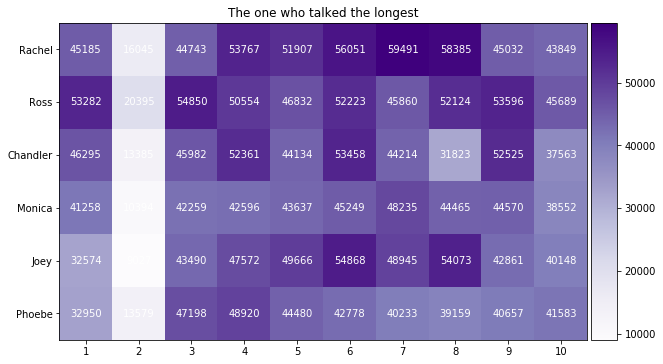

In [82]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


friends = df1['char'].unique()
seasons = df1['season'].unique()

speeches = np.array([[45185, 16045, 44743, 53767, 51907, 56051, 59491, 58385, 45032, 43849],
                    [53282, 20395, 54850, 50554, 46832, 52223, 45860, 52124, 53596, 45689],
                    [46295, 13385, 45982, 52361, 44134, 53458, 44214, 31823, 52525, 37563],
                    [41258, 10394, 42259, 42596, 43637, 45249, 48235, 44465, 44570, 38552],
                    [32574, 9027, 43490, 47572, 49666, 54868, 48945, 54073, 42861, 40148],
                    [32950, 13579, 47198, 48920, 44480, 42778, 40233, 39159, 40657, 41583]])


fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(speeches, cmap = 'Purples')


ax.set_xticks(np.arange(len(seasons)))
ax.set_yticks(np.arange(len(friends)))

ax.set_xticklabels(seasons)
ax.set_yticklabels(friends)


plt.setp(ax.get_xticklabels(), ha="center")

# Loop over data dimensions and create text annotations.
for i in range(len(friends)):
    for j in range(len(seasons)):
        text = ax.text(j, i, speeches[i, j],
                       ha="center", va="center", color="w")

ax.set_title("The one who talked the longest")
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)
colorbar(im)
#fig.tight_layout()
plt.savefig("heatmap.pdf")
plt.show()

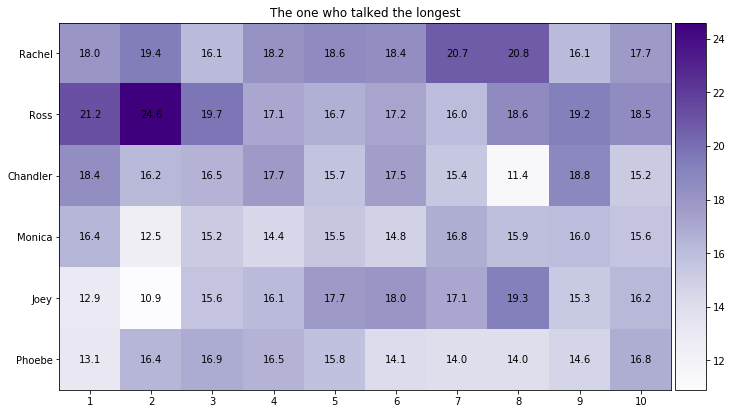

In [83]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


friends = df1['char'].unique()
seasons = df1['season'].unique()

speeches = np.array([[18.0, 19.4, 16.1, 18.2, 18.6, 18.4, 20.7, 20.8, 16.1, 17.7],
                    [21.2, 24.6, 19.7, 17.1, 16.7, 17.2, 16.0, 18.6, 19.2, 18.5],
                    [18.4, 16.2, 16.5, 17.7, 15.7, 17.5, 15.4, 11.4, 18.8, 15.2],
                    [16.4, 12.5, 15.2, 14.4, 15.5, 14.8, 16.8, 15.9, 16.0, 15.6],
                    [12.9, 10.9, 15.6, 16.1, 17.7, 18.0, 17.1, 19.3, 15.3, 16.2],
                    [13.1, 16.4, 16.9, 16.5, 15.8, 14.1, 14.0, 14.0, 14.6, 16.8]])


fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(speeches, cmap = 'Purples')


ax.set_xticks(np.arange(len(seasons)))
ax.set_yticks(np.arange(len(friends)))

ax.set_xticklabels(seasons)
ax.set_yticklabels(friends)


plt.setp(ax.get_xticklabels(), ha="center")

# Loop over data dimensions and create text annotations.
for i in range(len(friends)):
    for j in range(len(seasons)):
        text = ax.text(j, i, speeches[i, j],
                       ha="center", va="center", color="k")

ax.set_title("The one who talked the longest")
fig.tight_layout()
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax)
colorbar(im)
plt.savefig("heatmap_normalize.pdf")
plt.show()